In [1]:
from sympy import *
import numpy as np

init_printing()

In [2]:
t = Symbol('t')
q1 = Function('q1')(t)
q2 = Function('q2')(t)
l1 = Symbol('l1')
l2 = Symbol('l2')
lc1 = Symbol('lc1')
lc2 = Symbol('lc2')
m1 = Symbol('m1')
m2 = Symbol('m2')
i1 = Symbol('I1')
i2 = Symbol('I2')
g = Symbol('g')

q = np.array([[0], [q1], [q2]])
qd = np.array([[0], [diff(q1, t)], [diff(q2, t)]])
qdd = np.array([[0], [diff(diff(q1, t), t)], [diff(diff(q2, t), t)]])
m = [0, m1, m2]
# mi1 = np.array([
#     [0, 0, 0],
#     [0, i1, 0],
#     [0, 0, 0]
# ])
# mi2 = np.array([
#     [0, 0, 0],
#     [0, i2, 0],
#     [0, 0, 0]
# ])
# I = [np.zeros((3, 3)), mi1, mi2]
I = [0, i1, i2]

def show(matriz):
    O = Matrix(matriz)
    O = O.subs(diff(diff(q1, t), t)**2, Symbol('\ddot{q_1}^2'))
    O = O.subs(diff(diff(q2, t), t)**2, Symbol('\ddot{q_2}^2'))
    O = O.subs(diff(q1, t)**2, Symbol('\dot{q_1}^2'))
    O = O.subs(diff(q2, t)**2, Symbol('\dot{q_2}^2'))
    O = O.subs(diff(diff(q1, t), t), Symbol('\ddot{q_1}'))
    O = O.subs(diff(diff(q2, t), t), Symbol('\ddot{q_2}'))
    O = O.subs(diff(q1, t), Symbol('\dot{q_1}'))
    O = O.subs(diff(q2, t), Symbol('\dot{q_2}'))
    O = simplify(O)
    O = O.subs(sin(q1), Symbol('s1'))
    O = O.subs(sin(q2), Symbol('s2'))
    O = O.subs(cos(q1), Symbol('c1'))
    O = O.subs(cos(q2), Symbol('c2'))
    O = O.subs(q1, Symbol('q1'))
    O = O.subs(q2, Symbol('q2'))
    return O

In [3]:
w = [np.array([[0], [0], [0]])]
alpha = [np.array([[0], [0], [0]])]
ac = [np.array([[0], [0], [0]])]
ae = [np.array([[0], [0], [0]])]
gi = [np.array([[0], [-g], [0]])]
f = [np.zeros((3, 1)), np.array([[0], [0], [0]]), np.array([[0], [0], [0]]), np.array([[0], [0], [0]])]
tau = [np.zeros((3, 1)), np.array([[0], [0], [0]]), np.array([[0], [0], [0]]), np.array([[0], [0], [0]])]

R01 = np.array([
    [cos(q1), 0, -sin(q1)],
    [sin(q1), 0, cos(q1)],
    [0, -1, 0]
])

R12 = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

R02 = np.array([
    [cos(q1), 0, -sin(q1)],
    [sin(q1), 0, cos(q1)],
    [0, -1, 0]
])

R = np.array([
    [np.zeros((3, 3)), R01, R02],
    [np.zeros((3, 3)), np.zeros((3, 3)), R12]
])

r0c1 = np.array([[l1/2], [0], [0]])
r1c2 = np.array([[0], [0], [q2/2]])
r01 = np.array([[l1], [0], [0]])
r12 = np.array([[0], [0], [q2]])
r1c1 = np.array([[-(l1/2)], [0], [0]])
r2c2 = np.array([[0], [0], [-(q2/2)]])

r = np.array([
    [np.zeros((3, 1)), r01, np.zeros((3, 1))],
    [np.zeros((3, 1)), np.zeros((3, 1)), r12],
])

rc = np.array([
    [np.zeros((3, 1)), r0c1, np.zeros((3, 1))],
    [np.zeros((3, 1)), r1c1, r1c2],
    [np.zeros((3, 1)), np.zeros((3, 1)), r2c2]
])

z0 = np.array([[0], [0], [1]])
z1 = np.array([[-sin(q1)], [cos(q1)], [0]])
z = np.array([z0, z1])

<h1 align='center'> Recursão para frente: </h1>

### $$\text{Para } i = 1$$

### $$\text{Cálculo de } \omega_1 \text{:}$$

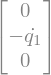

In [4]:
i = 1
w.append(np.array(R[i-1][i].T@(w[i-1]+(qd[i]*z[i-1]))))

show(w[i])

### $$\text{Cálculo de } \alpha_1 \text{:}$$

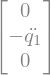

In [5]:
alpha.append(np.array(R[i-1][i].T@(alpha[i-1] + (qdd[i]*z[i-1]) + np.cross(w[i-1].T, np.array(qd[i]*z[i-1]).T).T)))

show(alpha[i])

### $$\text{Cálculo de } a_{e,1} \text{:}$$

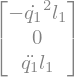

In [6]:
ae.append(np.array((R[i-1][i].T@ae[i-1]) + np.cross(alpha[i].T, r[i-1][i].T).T + np.cross(w[i].T, np.cross(w[i].T, r[i-1][i].T)).T))

show(ae[i])

### $$\text{Cálculo de } a_{c,1} \text{:}$$

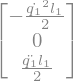

In [7]:
ac.append(np.array(ae[i] + np.cross(alpha[i].T, rc[i][i].T).T + np.cross(w[i].T, np.cross(w[i].T, rc[i][i].T)).T))

show(ac[i])

### $$\text{Cálculo de } g_1 \text{:}$$

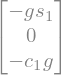

In [8]:
gi.append(np.array(R[i-1][i].T@gi[i-1]))

show(gi[i])

### $$\text{Para } i = 2$$

### $$\text{Cálculo de } \omega_2 \text{:}$$

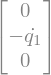

In [9]:
i = 2
#w.append(np.array(R[i-1][i].T@(w[i-1]+(qd[i]*z[i-1]))))
w.append(np.array(R[i-1][i].T@w[i-1]))

show(w[i])

### $$\text{Cálculo de } \alpha_2 \text{:}$$

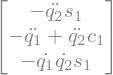

In [10]:
alpha.append(np.array(R[i-1][i].T@(alpha[i-1] + (qdd[i]*z[i-1]) + np.cross(w[i-1].T, np.array(qd[i]*z[i-1]).T).T)))

show(alpha[i])

### $$\text{Cálculo de } a_{e,2} \text{:}$$

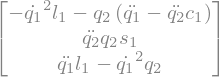

In [11]:
ae.append(np.array((R[i-1][i].T@ae[i-1]) + np.cross(alpha[i].T, r[i-1][i].T).T + np.cross(w[i].T, np.cross(w[i].T, r[i-1][i].T)).T))

show(ae[i])

### $$\text{Cálculo de } a_{c,2} \text{:}$$

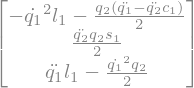

In [12]:
ac.append(np.array(ae[i] + np.cross(alpha[i].T, rc[i][i].T).T + np.cross(w[i].T, np.cross(w[i].T, rc[i][i].T)).T))

show(ac[i])

### $$\text{Cálculo de } g_2 \text{:}$$

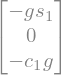

In [13]:
gi.append(np.array(R[i-1][i].T@gi[i-1]))

show(gi[i])

<h1 align='center'> Recursão para trás: </h1>

### $$\text{Para } i = 2$$

### $$\text{Cálculo de } f_2 \text{:}$$

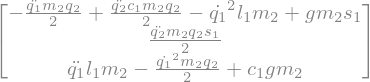

In [14]:
i = 2
f[i] = np.array((m[i]*ac[i]) - (m[i]*gi[i]))

show(f[i]).expand()

### $$\text{Cálculo de } \tau_2 \text{:}$$

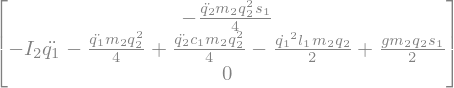

In [15]:
tau[i] = np.array(-np.cross(f[i].T, (r[i-1][i]+rc[i][i]).T).T + (I[i]*diff(Matrix(w[i]), t)) + np.cross(w[i].T, (I[i]*w[i]).T).T)

show(tau[i]).expand()

### $$\text{Para } i = 1$$

### $$\text{Cálculo de } f_1 \text{:}$$

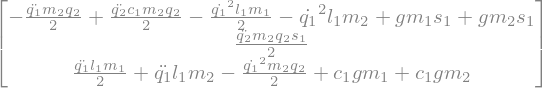

In [16]:
i = 1
f[i] = np.array((R[i][i+1]@f[i+1]) + (m[i]*ac[i]) - (m[i]*gi[i]))

show(f[i]).expand()

### $$\text{Cálculo de } \tau_1 \text{:}$$

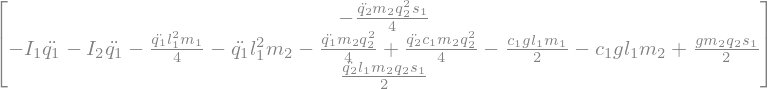

In [17]:
tau[i] = np.array((R[i][i+1]@tau[i+1]) - np.cross(f[i].T, (r[i-1][i]+rc[i][i]).T).T + np.cross((R[i][i+1]@f[i+1]).T, rc[i][i].T).T + (I[i]*diff(Matrix(w[i]), t)) + np.cross(w[i].T, (I[i]*w[i]).T).T)

show(tau[i]).expand()

<h2 align='center'> Solução Dinâmica Final: </h2>

### $$\tau_1 \text{:}$$

In [18]:
show(tau[1].T@z[0]).expand()

### $$f_2 \text{:}$$

In [19]:
show(f[2].T@z[1]).expand()